### 텍스트 데이터 다루기
- 텍스트 데이터는 비정형 데이터에 속하기도 함
    - 정형화된 틀을 갖고있지 않고 여러가지 형태 및 구조로 존재하기 때문
    - 따라서 대표적인 비정형 데이터임

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# 데이터셋 불러오기
train = pd.read_csv("C:/BigData_MachineLearning/dataset/train.csv")
test = pd.read_csv("C:/BigData_MachineLearning/dataset/test.csv")

In [3]:
# 데이터셋 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### name 시각화
- 모든 사람의 이름이 다르고 길이도 다르다.
- 따라서 텍스트 데이터는 비정형 데이터이다.

In [4]:
train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- 이름을 잘 살펴보면 Mr, Mrs 또는 Miss 그리고 , 와 . 으로 구분되어있음을 확인할 수 있다. 
### 각각의 이름에서 호칭을 추출해보자
- universal 함수(mean, sum, median...등)는 한번에 전체 데이터를 전부 계산한 값을 반환함
- apply(사용자정의함수)
  - 한 행씩 또는 한 열씩 돌아가면서 처리해줌

In [21]:
# 함수 생성
# 들어온 값에 대해 ,로 구분한 값을 반환
def split_title(name):
    return name.split(",")[1].split(".")[0].strip()

In [24]:
train["Title"] = train["Name"].apply(split_title)
test["Title"] = test["Name"].apply(split_title)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 호칭별 생존자 수 시각화

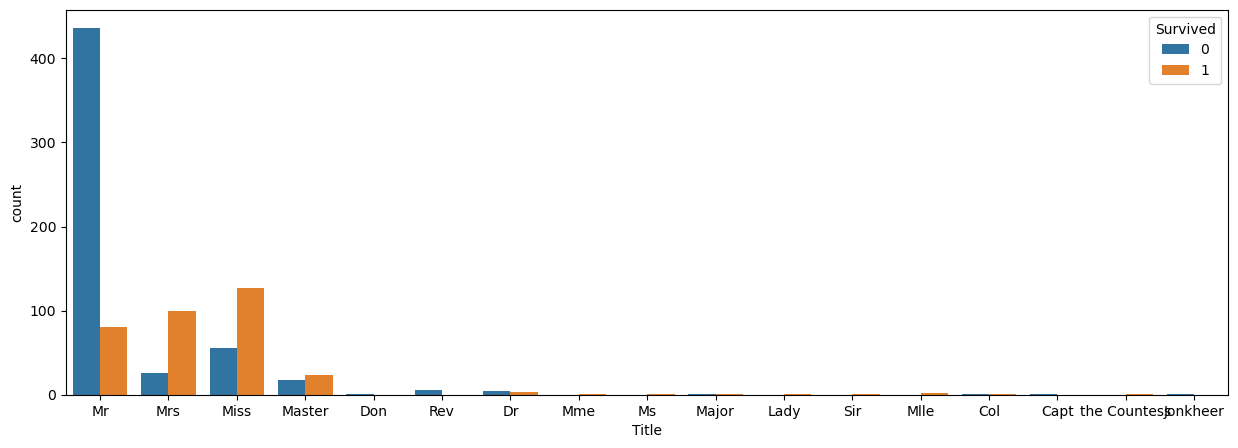

In [39]:
# 그래프가 표시될 창의 크기 설정
plt.figure(figsize=(15,5)) 
# 창 안에 들어갈 그래프
sns.countplot(data = train, x = "Title", hue = "Survived")
# plt.show를 하게되면 위에 뜨는 글자가 사라짐
plt.show()

- 남자의 경우 죽은 사람이 훨씬 많음 (Mr)
- 여성의 경우 산 사람이 더 많음 (Mrs, Miss)

### 그래프의 범위를 설정하여 표현

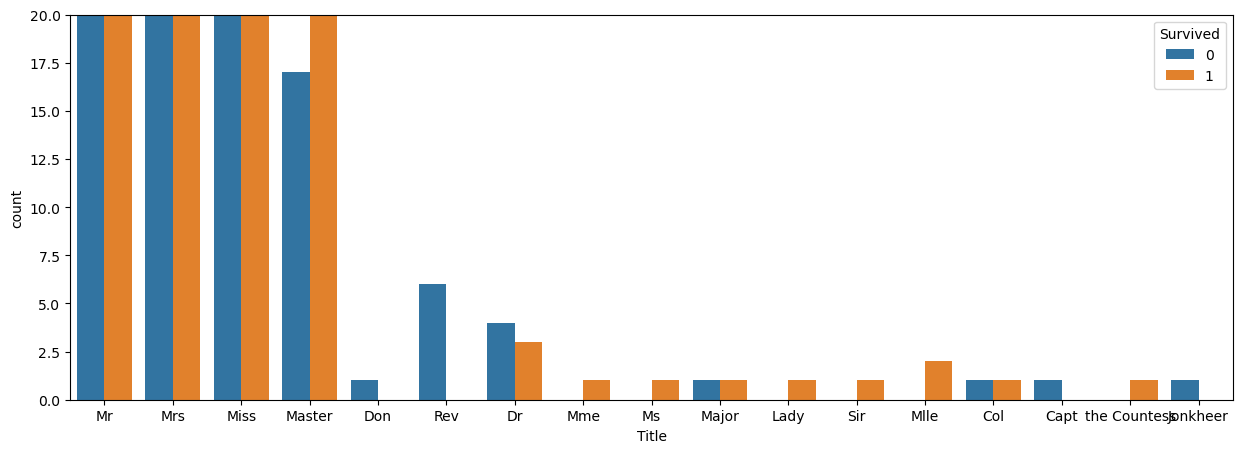

In [42]:
# 그래프가 표시될 창의 크기 설정
plt.figure(figsize=(15,5)) 
# 그래프에서 표시할 범위 설정
plt.ylim(0,20)
# 창 안에 들어갈 그래프
sns.countplot(data = train, x = "Title", hue = "Survived")
# plt.show를 하게되면 위에 뜨는 글자가 사라짐
plt.show()

### 호칭 통합
- 쓸데없는 자잘한 호칭들이 너무 많기 때문에 어느정도 합쳐주기로 함
  - Mr, Mrs, Miss는 살려둠
  - Master(도련님) 살려둠
  - Rev(목사) 살려둠
  - 나머지는 Other로 통합
- map 사용
  - 특정 값을 다른 값으로 변환해줌

In [49]:
# 유니크한 값 확인
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [54]:
# 딕셔너리 생성
# 원래 명칭을 Key 값으로 주고
# 바꿀 명칭을 value 값을 준다.
conver_title_dic = {
    'Mr':'Mr', 'Mrs':"Mrs", 'Miss':"Miss", 'Master':"Master", 'Don':"Other", 'Rev':"Rev", 'Dr':"Other", 'Mme':"Other", 'Ms':"Other",
       'Major':"Other", 'Lady':"Other", 'Sir':"Other", 'Mlle':"Other", 'Col':"Other", 'Capt':"Other", 'the Countess':"Other",
       'Jonkheer':"Other", 'Dona':"Other"
}

In [51]:
train["Title"] = train["Title"].map(conver_title_dic)
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

테스트 데이터에도 똑같이 적용

In [53]:
test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [55]:
test["Title"] = test["Title"].map(conver_title_dic)
test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

### 의미 없는 컬럼 삭제
- Ticket 컬럼 삭제
- Name 컬럼 삭제

In [57]:
train.drop(columns = ["Ticket","Name"], inplace=True)
test.drop(columns = ["Ticket","Name"], inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
